<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Modelador_estadistico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from openpyxl import workbook , load_workbook 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # Regresion multiple
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import statsmodels.api as sm

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
Bolivar = pd.read_excel("/content/drive/MyDrive/U CENTRAL ECONOMÍA/PRACTICAS/GRUPO BOLIVAR/base_prueba (1).xlsx", sheet_name="Inicial",header=0, index_col=None) 
Bolivar.head()

,ID,F_FECHAAVALUO,TOT_BANOS,DEPOSITO,HABITACIONES,ESTRATO,TOTALGARAJES,PISOS,SOTANOS,ANTIGUEDAD,EDIPISO,IDCATEGORIA,ASCENSOR,LATITUD,LONGITUD,LOCALIDAD,BARRIO,AREA_PRIVADA,AREA_PRIVADA_VALFINAL
0,1,2016-01-05,1,0,2,2,0,2,0,0,2.0,Casa,0,4.518112,-74.090000,SAN CRISTOBAL,YOMASA,39.661019,1.737997e+08
1,2,2016-01-05,1,0,2,2,0,2,0,0,2.0,Casa,0,4.518112,-74.090000,SAN CRISTOBAL,YOMASA,39.401477,1.743664e+08
2,3,2016-01-05,1,0,2,2,0,2,0,0,2.0,Casa,0,4.518112,-74.091686,SAN CRISTOBAL,YOMASA,39.420774,1.831345e+08
3,4,2016-01-05,1,0,2,3,0,24,0,0,NaN,Apartamento,1,4.583075,-74.168148,CIUDAD BOLIVAR,EL PENON DEL CORTIJO,37.464301,2.253010e+08
4,5,2016-01-05,1,0,2,2,0,6,0,0,2.0,Apartamento,0,4.525112,-74.087588,SAN CRISTOBAL,JUAN REY (LA PAZ),37.690574,1.759704e+08


In [66]:
Bolivar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10121 entries, 0 to 10120
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     10121 non-null  int64         
 1   F_FECHAAVALUO          10121 non-null  datetime64[ns]
 2   TOT_BANOS              10121 non-null  int64         
 3   DEPOSITO               10121 non-null  int64         
 4   HABITACIONES           10121 non-null  int64         
 5   ESTRATO                10121 non-null  int64         
 6   TOTALGARAJES           10121 non-null  int64         
 7   PISOS                  10121 non-null  int64         
 8   SOTANOS                10121 non-null  int64         
 9   ANTIGUEDAD             10121 non-null  int64         
 10  EDIPISO                8986 non-null   float64       
 11  IDCATEGORIA            10121 non-null  object        
 12  ASCENSOR               10121 non-null  int64         
 13  L

In [67]:
Bolivar.describe()

,ID,TOT_BANOS,DEPOSITO,HABITACIONES,ESTRATO,TOTALGARAJES,PISOS,SOTANOS,ANTIGUEDAD,EDIPISO,ASCENSOR,LATITUD,LONGITUD,AREA_PRIVADA,AREA_PRIVADA_VALFINAL
count,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,8986.000000,10121.000000,10121.000000,10121.000000,10121.000000,1.012100e+04
mean,5061.000000,1.323189,0.000988,2.305207,2.328130,0.006719,9.126964,0.043672,0.001877,4.938682,0.366960,4.633952,-74.155249,44.493168,1.907487e+08
std,2921.825371,0.467929,0.031419,0.582707,0.473537,0.081696,4.580072,0.218849,0.043289,3.532175,0.481999,0.070433,0.048304,5.255083,2.464278e+07
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.476112,-74.216996,22.266166,1.553078e+08
25%,2531.000000,1.000000,0.000000,2.000000,2.000000,0.000000,6.000000,0.000000,0.000000,2.000000,0.000000,4.611131,-74.208240,42.934870,1.654550e+08
50%,5061.000000,1.000000,0.000000,2.000000,2.000000,0.000000,6.000000,0.000000,0.000000,4.000000,0.000000,4.627112,-74.157344,44.458508,2.000398e+08
75%,7591.000000,2.000000,0.000000,3.000000,3.000000,0.000000,13.000000,0.000000,0.000000,6.000000,1.000000,4.691871,-74.117502,46.451695,2.108305e+08
max,10121.000000,2.000000,1.000000,3.000000,4.000000,1.000000,30.000000,3.000000,1.000000,25.000000,1.000000,4.761901,-74.026534,92.285299,8.421320e+08


In [68]:
# variable dummy 
Bolivar1 = pd.get_dummies(Bolivar, columns=['IDCATEGORIA'])
Bolivar1.head()

,ID,F_FECHAAVALUO,TOT_BANOS,DEPOSITO,HABITACIONES,ESTRATO,TOTALGARAJES,PISOS,SOTANOS,ANTIGUEDAD,EDIPISO,ASCENSOR,LATITUD,LONGITUD,LOCALIDAD,BARRIO,AREA_PRIVADA,AREA_PRIVADA_VALFINAL,IDCATEGORIA_Apartamento,IDCATEGORIA_Casa
0,1,2016-01-05,1,0,2,2,0,2,0,0,2.0,0,4.518112,-74.090000,SAN CRISTOBAL,YOMASA,39.661019,1.737997e+08,0,1
1,2,2016-01-05,1,0,2,2,0,2,0,0,2.0,0,4.518112,-74.090000,SAN CRISTOBAL,YOMASA,39.401477,1.743664e+08,0,1
2,3,2016-01-05,1,0,2,2,0,2,0,0,2.0,0,4.518112,-74.091686,SAN CRISTOBAL,YOMASA,39.420774,1.831345e+08,0,1
3,4,2016-01-05,1,0,2,3,0,24,0,0,NaN,1,4.583075,-74.168148,CIUDAD BOLIVAR,EL PENON DEL CORTIJO,37.464301,2.253010e+08,1,0
4,5,2016-01-05,1,0,2,2,0,6,0,0,2.0,0,4.525112,-74.087588,SAN CRISTOBAL,JUAN REY (LA PAZ),37.690574,1.759704e+08,1,0


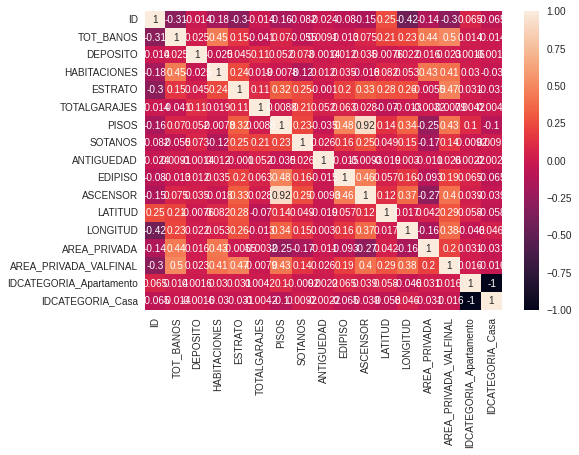

In [69]:
Bolivar1=Bolivar1.corr(method="spearman") 
sns.heatmap(Bolivar1,annot=True) # Diagrama de correlacion 

In [70]:
corr_matrix = Bolivar1.corr(method='pearson')
corr_matrix

,ID,TOT_BANOS,DEPOSITO,HABITACIONES,ESTRATO,TOTALGARAJES,PISOS,SOTANOS,ANTIGUEDAD,EDIPISO,ASCENSOR,LATITUD,LONGITUD,AREA_PRIVADA,AREA_PRIVADA_VALFINAL,IDCATEGORIA_Apartamento,IDCATEGORIA_Casa
ID,1.000000,-0.569868,-0.011611,-0.416271,-0.592999,-0.010034,-0.362000,-0.189627,-0.004895,-0.239229,-0.361520,0.268674,-0.724359,-0.194515,-0.682075,0.109495,-0.109495
TOT_BANOS,-0.569868,1.000000,-0.131781,0.747030,0.258235,-0.270921,-0.042694,-0.300707,-0.115468,-0.165596,-0.061764,0.184832,0.295751,0.664309,0.682944,0.005120,-0.005120
DEPOSITO,-0.011611,-0.131781,1.000000,-0.186280,-0.096711,0.138598,-0.071110,0.039946,-0.083399,-0.106933,-0.082592,-0.193895,-0.068587,-0.069161,-0.179495,-0.015361,0.015361
HABITACIONES,-0.416271,0.747030,-0.186280,1.000000,0.255615,-0.169569,-0.184918,-0.409619,-0.094743,-0.169735,-0.211226,0.062950,0.051894,0.711619,0.537881,0.036314,-0.036314
ESTRATO,-0.592999,0.258235,-0.096711,0.255615,1.000000,-0.012556,0.522237,0.349338,-0.174821,0.346040,0.515836,0.275791,0.536956,-0.120961,0.705568,0.045907,-0.045907
TOTALGARAJES,-0.010034,-0.270921,0.138598,-0.169569,-0.012556,1.000000,-0.116899,0.281589,0.024406,-0.028076,-0.099789,-0.325512,-0.129128,-0.125758,-0.254243,-0.013336,0.013336
PISOS,-0.362000,-0.042694,-0.071110,-0.184918,0.522237,-0.116899,1.000000,0.399234,-0.201551,0.744976,0.993537,0.082107,0.602003,-0.543660,0.513603,0.138071,-0.138071
SOTANOS,-0.189627,-0.300707,0.039946,-0.409619,0.349338,0.281589,0.399234,1.000000,-0.069710,0.306095,0.424699,-0.083935,0.293684,-0.510454,0.084516,-0.028991,0.028991
ANTIGUEDAD,-0.004895,-0.115468,-0.083399,-0.094743,-0.174821,0.024406,-0.201551,-0.069710,1.000000,-0.180593,-0.181590,-0.196580,-0.109719,-0.047589,-0.178137,-0.017649,0.017649
EDIPISO,-0.239229,-0.165596,-0.106933,-0.169735,0.346040,-0.028076,0.744976,0.306095,-0.180593,1.000000,0.731143,-0.037075,0.366801,-0.419106,0.264092,0.125133,-0.125133


In [71]:
corr_matrix['AREA_PRIVADA_VALFINAL']

ID                        -0.682075
TOT_BANOS                  0.682944
DEPOSITO                  -0.179495
HABITACIONES               0.537881
ESTRATO                    0.705568
TOTALGARAJES              -0.254243
PISOS                      0.513603
SOTANOS                    0.084516
ANTIGUEDAD                -0.178137
EDIPISO                    0.264092
ASCENSOR                   0.494713
LATITUD                    0.274317
LONGITUD                   0.621892
AREA_PRIVADA               0.187509
AREA_PRIVADA_VALFINAL      1.000000
IDCATEGORIA_Apartamento    0.023114
IDCATEGORIA_Casa          -0.023114
Name: AREA_PRIVADA_VALFINAL, dtype: float64

## **Regresion Lineal**

**Avaluo del Inmueble**
\begin{equation}
                     Avaluo_1 = β_1(N_{Baños})+β_2(N_{Estrato})+β_3(N_{Pisos})+β_4(N_{ ascensores})+β_5(N_{Habitaciones})+β_6(N_{Garajes})+β_7(N_{Antiguedad})+e
\end{equation}


In [72]:
Bolivar1=Bolivar.query("F_FECHAAVALUO >= '2017-01-01' and F_FECHAAVALUO <='2019-01-31'")
Bolivar1=pd.DataFrame(Bolivar1)
Bolivar1.head()

,ID,F_FECHAAVALUO,TOT_BANOS,DEPOSITO,HABITACIONES,ESTRATO,TOTALGARAJES,PISOS,SOTANOS,ANTIGUEDAD,EDIPISO,IDCATEGORIA,ASCENSOR,LATITUD,LONGITUD,LOCALIDAD,BARRIO,AREA_PRIVADA,AREA_PRIVADA_VALFINAL
1879,1880,2017-01-03,2,0,3,2,0,6,0,0,5.0,Apartamento,0,4.505072,-74.088425,USME,SAN PEDRO SUR,52.318689,2.011801e+08
1880,1881,2017-01-03,2,0,3,2,0,6,0,0,6.0,Apartamento,0,4.505072,-74.088425,USME,SAN PEDRO SUR,51.948245,2.031290e+08
1881,1882,2017-01-05,2,0,3,2,0,6,0,0,4.0,Apartamento,0,4.505072,-74.088425,USME,SAN PEDRO SUR,57.924090,2.095473e+08
1882,1883,2017-01-05,2,0,3,2,0,6,0,0,3.0,Apartamento,0,4.505072,-74.088425,USME,SAN PEDRO SUR,58.292557,2.126525e+08
1883,1884,2017-01-05,2,0,3,2,0,6,0,0,4.0,Apartamento,0,4.505072,-74.088425,USME,SAN PEDRO SUR,58.465408,2.130888e+08


In [73]:
est1 = smf.ols(formula='Bolivar1["AREA_PRIVADA_VALFINAL"]~ Bolivar1["TOT_BANOS"] + Bolivar1["ESTRATO"]+ Bolivar1["PISOS"]+Bolivar1["HABITACIONES"]+Bolivar1["DEPOSITO"]+Bolivar1["SOTANOS"]', data = Bolivar1 ).fit() # regresion lineal 
est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Bolivar1["AREA_PRIVADA_VALFINAL"]   R-squared:                       0.634
Model:                                           OLS   Adj. R-squared:                  0.633
Method:                                Least Squares   F-statistic:                     2168.
Date:                               Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                                       13:20:00   Log-Likelihood:            -1.3515e+05
No. Observations:                               7526   AIC:                         2.703e+05
Df Residuals:                                   7519   BIC:                         2.704e+05
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 9.399e+07   1.06e+06     88.794      0.000    9.19e+07    9.61e+07
Bolivar1["TOT_BANOS"]     2.406e+07   4.01e+05     59.924      0.000    2.33e+07    2.48e+07
Bolivar1["ESTRATO"]       1.692e+07   4.03e+05     41.967      0.000    1.61e+07    1.77e+07
Bolivar1["PISOS"]         1.416e+06   4.36e+04     32.458      0.000    1.33e+06     1.5e+06
Bolivar1["HABITACIONES"]  5.345e+06   3.24e+05     16.510      0.000    4.71e+06    5.98e+06
Bolivar1["DEPOSITO"]      1.732e+08   5.13e+06     33.767      0.000    1.63e+08    1.83e+08
Bolivar1["SOTANOS"]       1.418e+07   9.67e+05     14.663      0.000    1.23e+07    1.61e+07
==============================================================================
Omnibus:                     8996.168   Durbin-Watson:                   0.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10792184.724
Skew:                           5.488   Prob(JB):                         0.00
Kurtosis:                     188.190   Cond. No.                         304.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
residuals = est1.resid
fitted_value = est1.fittedvalues
stand_resids = est1.resid_pearson
influence = est1.get_influence()
leverage = influence.hat_matrix_diag

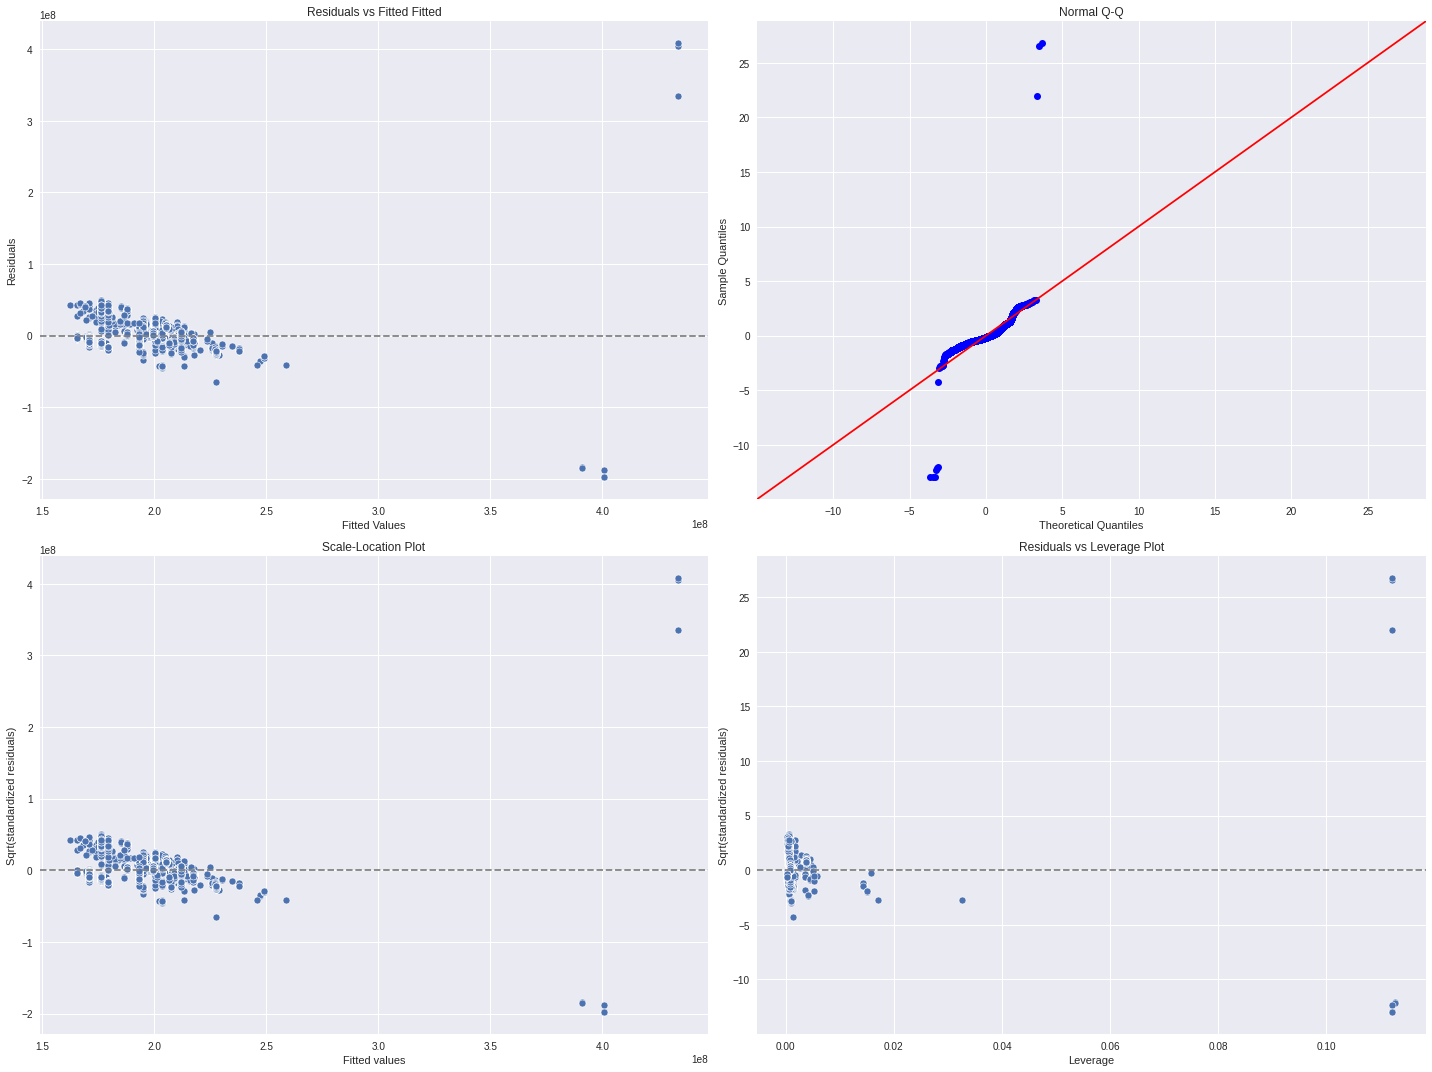

In [75]:
# PLot different diagnostic plots
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2) 
plt.style.use('seaborn') 
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted Fitted')
# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')
# Scale-Location Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('Sqrt(standardized residuals)')
ax[1, 0].set_title('Scale-Location Plot')
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Sqrt(standardized residuals)')
ax[1, 1].set_title('Residuals vs Leverage Plot')
plt.tight_layout()
plt.show()

In [76]:
Bolivar2=Bolivar.query("F_FECHAAVALUO >= '2017-01-01' and F_FECHAAVALUO <='2019-08-31'")
Bolivar2=pd.DataFrame(Bolivar2)
Bolivar2.head()

,ID,F_FECHAAVALUO,TOT_BANOS,DEPOSITO,HABITACIONES,ESTRATO,TOTALGARAJES,PISOS,SOTANOS,ANTIGUEDAD,EDIPISO,IDCATEGORIA,ASCENSOR,LATITUD,LONGITUD,LOCALIDAD,BARRIO,AREA_PRIVADA,AREA_PRIVADA_VALFINAL
1879,1880,2017-01-03,2,0,3,2,0,6,0,0,5.0,Apartamento,0,4.505072,-74.088425,USME,SAN PEDRO SUR,52.318689,2.011801e+08
1880,1881,2017-01-03,2,0,3,2,0,6,0,0,6.0,Apartamento,0,4.505072,-74.088425,USME,SAN PEDRO SUR,51.948245,2.031290e+08
1881,1882,2017-01-05,2,0,3,2,0,6,0,0,4.0,Apartamento,0,4.505072,-74.088425,USME,SAN PEDRO SUR,57.924090,2.095473e+08
1882,1883,2017-01-05,2,0,3,2,0,6,0,0,3.0,Apartamento,0,4.505072,-74.088425,USME,SAN PEDRO SUR,58.292557,2.126525e+08
1883,1884,2017-01-05,2,0,3,2,0,6,0,0,4.0,Apartamento,0,4.505072,-74.088425,USME,SAN PEDRO SUR,58.465408,2.130888e+08


In [77]:
est2 = smf.ols(formula='Bolivar2["AREA_PRIVADA_VALFINAL"]~ Bolivar2["ESTRATO"] + Bolivar2["HABITACIONES"]+ Bolivar2["TOTALGARAJES"]+Bolivar2["EDIPISO"]+Bolivar2["ASCENSOR"]', data = Bolivar2 ).fit() # regresion lineal 
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Bolivar2["AREA_PRIVADA_VALFINAL"]   R-squared:                       0.557
Model:                                           OLS   Adj. R-squared:                  0.557
Method:                                Least Squares   F-statistic:                     1766.
Date:                               Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                                       13:20:01   Log-Likelihood:            -1.2619e+05
No. Observations:                               7032   AIC:                         2.524e+05
Df Residuals:                                   7026   BIC:                         2.524e+05
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.058e+08   1.04e+06    101.875      0.000    1.04e+08    1.08e+08
Bolivar2["ESTRATO"]       2.131e+07    4.2e+05     50.689      0.000    2.05e+07    2.21e+07
Bolivar2["HABITACIONES"]  1.307e+07   2.99e+05     43.683      0.000    1.25e+07    1.37e+07
Bolivar2["TOTALGARAJES"]  2.221e+07   8.69e+06      2.555      0.011    5.17e+06    3.93e+07
Bolivar2["EDIPISO"]      -9.553e+04   6.36e+04     -1.503      0.133    -2.2e+05    2.91e+04
Bolivar2["ASCENSOR"]      1.242e+07   4.78e+05     25.972      0.000    1.15e+07    1.34e+07
==============================================================================
Omnibus:                      333.237   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.286
Skew:                           0.556   Prob(JB):                     1.60e-83
Kurtosis:                       3.254   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
Bolivar3=Bolivar.query("F_FECHAAVALUO >= '2019-09-01' and F_FECHAAVALUO <='2019-12-31'")
Bolivar3=pd.DataFrame(Bolivar3)
Bolivar3.head()

,ID,F_FECHAAVALUO,TOT_BANOS,DEPOSITO,HABITACIONES,ESTRATO,TOTALGARAJES,PISOS,SOTANOS,ANTIGUEDAD,EDIPISO,IDCATEGORIA,ASCENSOR,LATITUD,LONGITUD,LOCALIDAD,BARRIO,AREA_PRIVADA,AREA_PRIVADA_VALFINAL
9906,9907,2019-09-04,2,0,2,2,0,6,0,0,3.0,Apartamento,0,4.551738,-74.081951,SAN CRISTOBAL,BOSQUE DE LOS ALPES,39.671251,1.855085e+08
9907,9908,2019-09-06,2,0,2,2,0,6,0,0,2.0,Apartamento,0,4.551707,-74.082039,SAN CRISTOBAL,BOSQUE DE LOS ALPES,44.088271,2.076505e+08
9908,9909,2019-09-11,2,0,2,2,0,6,0,0,2.0,Apartamento,0,4.551738,-74.081952,SAN CRISTOBAL,BOSQUE DE LOS ALPES,40.950692,1.826792e+08
9909,9910,2019-09-16,2,0,2,2,0,6,0,0,2.0,Apartamento,0,4.551738,-74.081952,SAN CRISTOBAL,BOSQUE DE LOS ALPES,43.831210,1.915392e+08
9910,9911,2019-09-17,1,0,2,2,0,8,1,0,1.0,Apartamento,1,4.570581,-74.078975,SAN CRISTOBAL,SAN CRISTOBAL SUR,45.386926,2.173365e+08


In [79]:
est = smf.ols(formula='Bolivar["AREA_PRIVADA_VALFINAL"]~ Bolivar["ESTRATO"] + Bolivar["HABITACIONES"]+ Bolivar["TOTALGARAJES"]+Bolivar["EDIPISO"]+Bolivar["ASCENSOR"]', data = Bolivar ).fit() # regresion lineal 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Bolivar["AREA_PRIVADA_VALFINAL"]   R-squared:                       0.541
Model:                                          OLS   Adj. R-squared:                  0.541
Method:                               Least Squares   F-statistic:                     2120.
Date:                              Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                                      13:20:01   Log-Likelihood:            -1.6132e+05
No. Observations:                              8986   AIC:                         3.227e+05
Df Residuals:                                  8980   BIC:                         3.227e+05
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.115e+08    9.5e+05    117.320      0.000     1.1e+08    1.13e+08
Bolivar["ESTRATO"]       1.761e+07    3.9e+05     45.147      0.000    1.68e+07    1.84e+07
Bolivar["HABITACIONES"]  1.327e+07   2.84e+05     46.656      0.000    1.27e+07    1.38e+07
Bolivar["TOTALGARAJES"] -9.722e+06   2.54e+06     -3.821      0.000   -1.47e+07   -4.73e+06
Bolivar["EDIPISO"]       1.737e+05   5.39e+04      3.220      0.001     6.8e+04    2.79e+05
Bolivar["ASCENSOR"]      1.467e+07    4.3e+05     34.105      0.000    1.38e+07    1.55e+07
==============================================================================
Omnibus:                      418.512   Durbin-Watson:                   0.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.345
Skew:                           0.563   Prob(JB):                    1.34e-104
Kurtosis:                       3.106   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Bosque aleatorio**

In [80]:
data = Bolivar[['AREA_PRIVADA_VALFINAL', 'ESTRATO', 'HABITACIONES','TOTALGARAJES', 'ASCENSOR']]
data.head()

,AREA_PRIVADA_VALFINAL,ESTRATO,HABITACIONES,TOTALGARAJES,ASCENSOR
0,1.737997e+08,2,2,0,0
1,1.743664e+08,2,2,0,0
2,1.831345e+08,2,2,0,0
3,2.253010e+08,3,2,0,1
4,1.759704e+08,2,2,0,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10121 entries, 0 to 10120
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AREA_PRIVADA_VALFINAL  10121 non-null  float64
 1   ESTRATO                10121 non-null  int64  
 2   HABITACIONES           10121 non-null  int64  
 3   TOTALGARAJES           10121 non-null  int64  
 4   ASCENSOR               10121 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 395.5 KB


In [82]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = data.drop(["ESTRATO",'HABITACIONES','TOTALGARAJES'],axis = 1)

# y es nuestra variable dependiente
y = data.AREA_PRIVADA_VALFINAL

# División 75% de datos para entrenamiento, 25% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [83]:
BA_model = RandomForestRegressor(n_estimators = 19, 
                                  random_state = 2016,
                                  min_samples_leaf = 8,)

In [84]:
BA_model.fit(X_train, y_train) 

RandomForestRegressor(min_samples_leaf=8, n_estimators=19, random_state=2016)

In [85]:
BA_model.score(X_test, y_test) 

0.8033870163658562

In [86]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [87]:
# Predicción del modelo usando los datos de prueba
y_pred = BA_model.predict(X_test)